In [1]:
pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fc185bf4b1e3bd28ed4fd9cf9783293bbdefb895dc3a9b4d3612b6e4b661b776
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [2]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install -U ydata-profiling
from ydata_profiling import ProfileReport
import statsmodels as sm

In [36]:
df_original = pd.read_csv('/content/sample_data/KL_property_listing.csv')
df = df_original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [37]:
#check null values based on column
df.isnull().sum()



Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

Based on the datasets, we can make same assumption for car parks. We can fill that with value of 0 as the missing values has high proability, almost 100% because of iProperty doesn't have furnishing or car parks to begin with.

In [38]:
#data cleaning for car parks (highest num of null)
df['Car Parks'] = df['Car Parks'].fillna(0)

Based on our profile for this datasets, rooms, bathrooms and size, these columns have high correlations with price. Simply impute them with statistical approaches such as mean and median might cause our price perdiction become less precise. Furthermore, with 53883 observations, null value for these 3 columns maximum will only affect 5782 observations to be lost, we still have more than 45,000 obeservations. Hence, any imputation is not advisable.

For price column, filling missing values for our predict target with any approaches is not advisable either.
Hence, for the missing values for these 4 column, we just simply drop them.


In [39]:
#derive function to drop null values for specific column
def drop_null(df,column):
    df=df.loc[df[column].notna()]

    return df

df=drop_null(df,'Bathrooms')
df=drop_null(df,'Rooms')
df=drop_null(df,'Size')
df=drop_null(df,'Price')
df=drop_null(df,'Furnishing')

Check all columns are out of missing values

In [40]:
df.isna().sum()


Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Size             0
Furnishing       0
dtype: int64

Afer checking, all values are out of missing values.

Next, we need to go into each column and see their data type. Let's see how many observations left, and their relative data type for our second cleaning phase.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       45207 non-null  object 
 1   Price          45207 non-null  object 
 2   Rooms          45207 non-null  object 
 3   Bathrooms      45207 non-null  float64
 4   Car Parks      45207 non-null  float64
 5   Property Type  45207 non-null  object 
 6   Size           45207 non-null  object 
 7   Furnishing     45207 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.1+ MB


Location, Furnishing, Property Type are meant to be categorical. Hence, string is good for these columns.

However, price, rooms, size are string in dataset, but they're supposed to be a countinuous value (numerical value). Hence, some cleaning need to be focused on these 3 columns.

For Price, it's good to just get rid of the 'RM' in the string, and change it's data type to float64.



In [42]:
df['Price']=df['Price'].str.replace('RM','').str.replace(',','').apply(pd.to_numeric)


In [43]:
df['Price']=df['Price']/1000000

For Rooms, Let's do a summary to see types of rooms occur in this dataset.

In [44]:
df['Rooms'].value_counts()

Rooms
3           11995
3+1          7168
2            4686
4            4264
4+1          3873
5+1          2126
1            2077
5            1778
2+1          1740
1+1          1045
6             799
Studio        737
6+1           710
3+2           423
4+2           385
5+2           363
7             316
7+1           208
2+2           125
8             103
6+             68
8+1            62
9              33
7+             26
10             21
8+             13
9+1            11
10+             7
12              7
1+2             5
20 Above        5
10+1            4
11              4
12+             4
13+             3
11+1            3
14              2
9+              2
16              2
15+             1
18              1
13+1            1
13              1
Name: count, dtype: int64

Before we change this into numerical, some points we need to know.

1) We must think some way to deal with '+'


Based on this [article from PropertyGuru](https://www.propertyguru.com.sg/property-guides/study-room-bedroom-condo-comparison-41440), '2+1' property means 2 bedrooms + 1 bonus room. The +1 can be a variety, from study room, to utility room or store room. Maybe even helper's quarter. It will be helpful to verify with the listing agent on this. Bonus room normally will be not larger than bedrooms, as bedrooms are designed to put more furniture like bed, chairs and etc.

Hence, for this case, we will treat a unit value after '+' sign as 0.5. Which mean +1 means 0.5, +2 means 1 and so on.

2) What's the value suitable for 'Studio' and '20 above'

For Studio, it actually only have 1 bedrooms and other spaces such as kitchen, store, etc. Based on this [article](https://www.stuytown.com/community/not-in-use-renting/studio-apartment-vs-1-bedroom-which-is-right-for-you#:~:text=The%20defining%20difference%20between%20a,room%20with%20a%20separate%20bathroom.), since it basically only have 1 bedrooms with much more smaller space, we have size for smaller space indicator, so we'll assume Studio has only 1 bedroom.

For 20 above, only 6 cases from it and this value is far higher from other observations. Hence, we will assume this as 21.





In [45]:
def clean_number(value):
    if '+' in value:
        parts = value.split('+')
        base_value = float(parts[0])
        add_value = float(parts[1]) / 2 if parts[1] else 0
        return base_value + add_value
    elif(value=='Studio'):
      return 1.0
    elif(value=='20 Above'):
      return 21.0
    else:
      # Direct conversion if no '+'
        return float(value)

In [46]:
df['Rooms'] = df['Rooms'].apply(clean_number)
df['Rooms'].value_counts()

Rooms
3.0     12120
3.5      7168
2.0      4691
4.0      4687
4.5      3873
1.0      2814
5.0      2163
5.5      2126
2.5      1740
6.0      1230
1.5      1045
6.5       710
7.0       342
7.5       208
8.0       116
8.5        62
9.0        35
10.0       28
9.5        11
12.0       11
21.0        5
13.0        4
10.5        4
11.0        4
11.5        3
14.0        2
16.0        2
15.0        1
18.0        1
13.5        1
Name: count, dtype: int64

For column 'Size', there is 2 attributes recorded, their size in sq.ft., and also type of the size, whether it is landed or built up. Hence, we just simply distribute this 2 attributes into 2 new columns, and we drop the column 'Size'. Instead, we will name 2 new columns 'SizeType' and 'SizeValue'

In [47]:
df['Size'].value_counts()

Size
Land area : 22x75 sq. ft.      550
Built-up : 1,100 sq. ft.       469
Built-up : 950 sq. ft.         441
Land area : 22x80 sq. ft.      345
Built-up : 1,200 sq. ft.       320
                              ... 
Land area : 4275 sq. ft.         1
Land area : 2098.96 sq. ft.      1
Built-up : 4,950 sq. ft.         1
Built-up : 4,993 sq. ft.         1
Land area : 1544 sq. ft.         1
Name: count, Length: 5427, dtype: int64

In [48]:
import pandas as pd
import re

def process_size_info(string):
    # Extract the type (text before the colon)
    type_match = re.search(r'^(.*?)(?=:)', string)
    size_type = type_match.group(1).strip().title() if type_match else "Unknown"

    # Handle cases where the unit is in acres
    acres_match = re.search(r'([\d,]+)\s*acres?', string, re.IGNORECASE)
    if acres_match:
        # Convert acres to square feet (1 acre = 43,560 sq. ft.)
        acres_value = float(acres_match.group(1).replace(",", ""))
        size_area = acres_value * 43560  # Acres to square feet conversion
        return size_type, size_area

    # Check for dimensions with spaces (e.g., "22 x 75") or with quotes (e.g., "24' x 80'")
    dimensions_match = re.search(r"(\d+)\s*['x]\s*(\d+)", string, re.IGNORECASE)
    if dimensions_match:
        length = float(dimensions_match.group(1))
        width = float(dimensions_match.group(2))
        size_area = length * width
        return size_type, size_area

    # Check for single area value with "sq ft", "sqft", or variations like "sf sq. ft."
    area_match = re.search(r'([\d,]+)\s*(sf\s*|sq(ft|\.ft)?)', string, re.IGNORECASE)
    if area_match:
        size_area = float(area_match.group(1).replace(",", ""))
        return size_type, size_area

    # Default case for unknown or invalid values
    return size_type, None

# Apply the function separately for SizeType and SizeArea
df['SizeType'], df['SizeArea'] = zip(*df['Size'].apply(process_size_info))


In [49]:
df=drop_null(df,'SizeArea')
df=df.drop(columns='Size')

df.isna().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Furnishing       0
SizeType         0
SizeArea         0
dtype: int64

In [50]:
#Explanatory Data Analysis
Report=ProfileReport(df,title="KL Property Dataset")
Report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
from sklearn.preprocessing import OneHotEncoder

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['Location', 'Property Type', 'Furnishing', 'SizeType']
No. of. categorical features:  4


In [52]:
# prompt: print(object_cols)

object_cols = ['Furnishing', 'SizeType']
object_cols

['Furnishing', 'SizeType']

In [53]:
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
print(OH_cols.head(1))


     0    1    2    3    4    5
0  1.0  0.0  0.0  0.0  1.0  0.0


In [54]:
# OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
print(df_final)

                                Location  Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC, Kuala Lumpur   1.25    2.5        3.0        2.0   
1        Damansara Heights, Kuala Lumpur   6.80    6.0        7.0        0.0   
2                  Dutamas, Kuala Lumpur   1.03    3.0        4.0        2.0   
4              Bukit Jalil, Kuala Lumpur   0.90    4.5        3.0        2.0   
5      Taman Tun Dr Ismail, Kuala Lumpur   5.35    5.0        5.0        4.0   
...                                  ...    ...    ...        ...        ...   
53878              Bangsar, Kuala Lumpur   5.10    5.5        4.0        0.0   
53879              Bangsar, Kuala Lumpur   5.00    5.0        4.0        0.0   
53880              Bangsar, Kuala Lumpur   5.50    5.5        4.0        0.0   
53881          Wangsa Maju, Kuala Lumpur   0.48    3.0        2.0        0.0   
53882              Setapak, Kuala Lumpur   0.54    4.0        2.0        3.0   

                    Property Type  Size

In [30]:
#Explanatory Data Analysis including Categorical Data
Report=ProfileReport(df_final,title="KL Property Dataset")
Report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
df_final.shape

# Filtering outliers using IQR

Q1, Q3 = df_final['Price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df_final = df_final[(df_final['Price'] >= Q1 - 1.5 * IQR) & (df_final['Price'] <= Q3 + 1.5 * IQR)]
df_final.shape


(40938, 13)

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

# Split experimental data, Y and observations data, X
X = df_final.drop(['Price','Location','Property Type'], axis=1)
Y = df_final['Price']


# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [76]:
X_train.shape
Y_train.shape

(32750,)

MAPE:  3.444188895636772
RMSE:  2.678535178295977
R-sqaured 0.04535477099668661


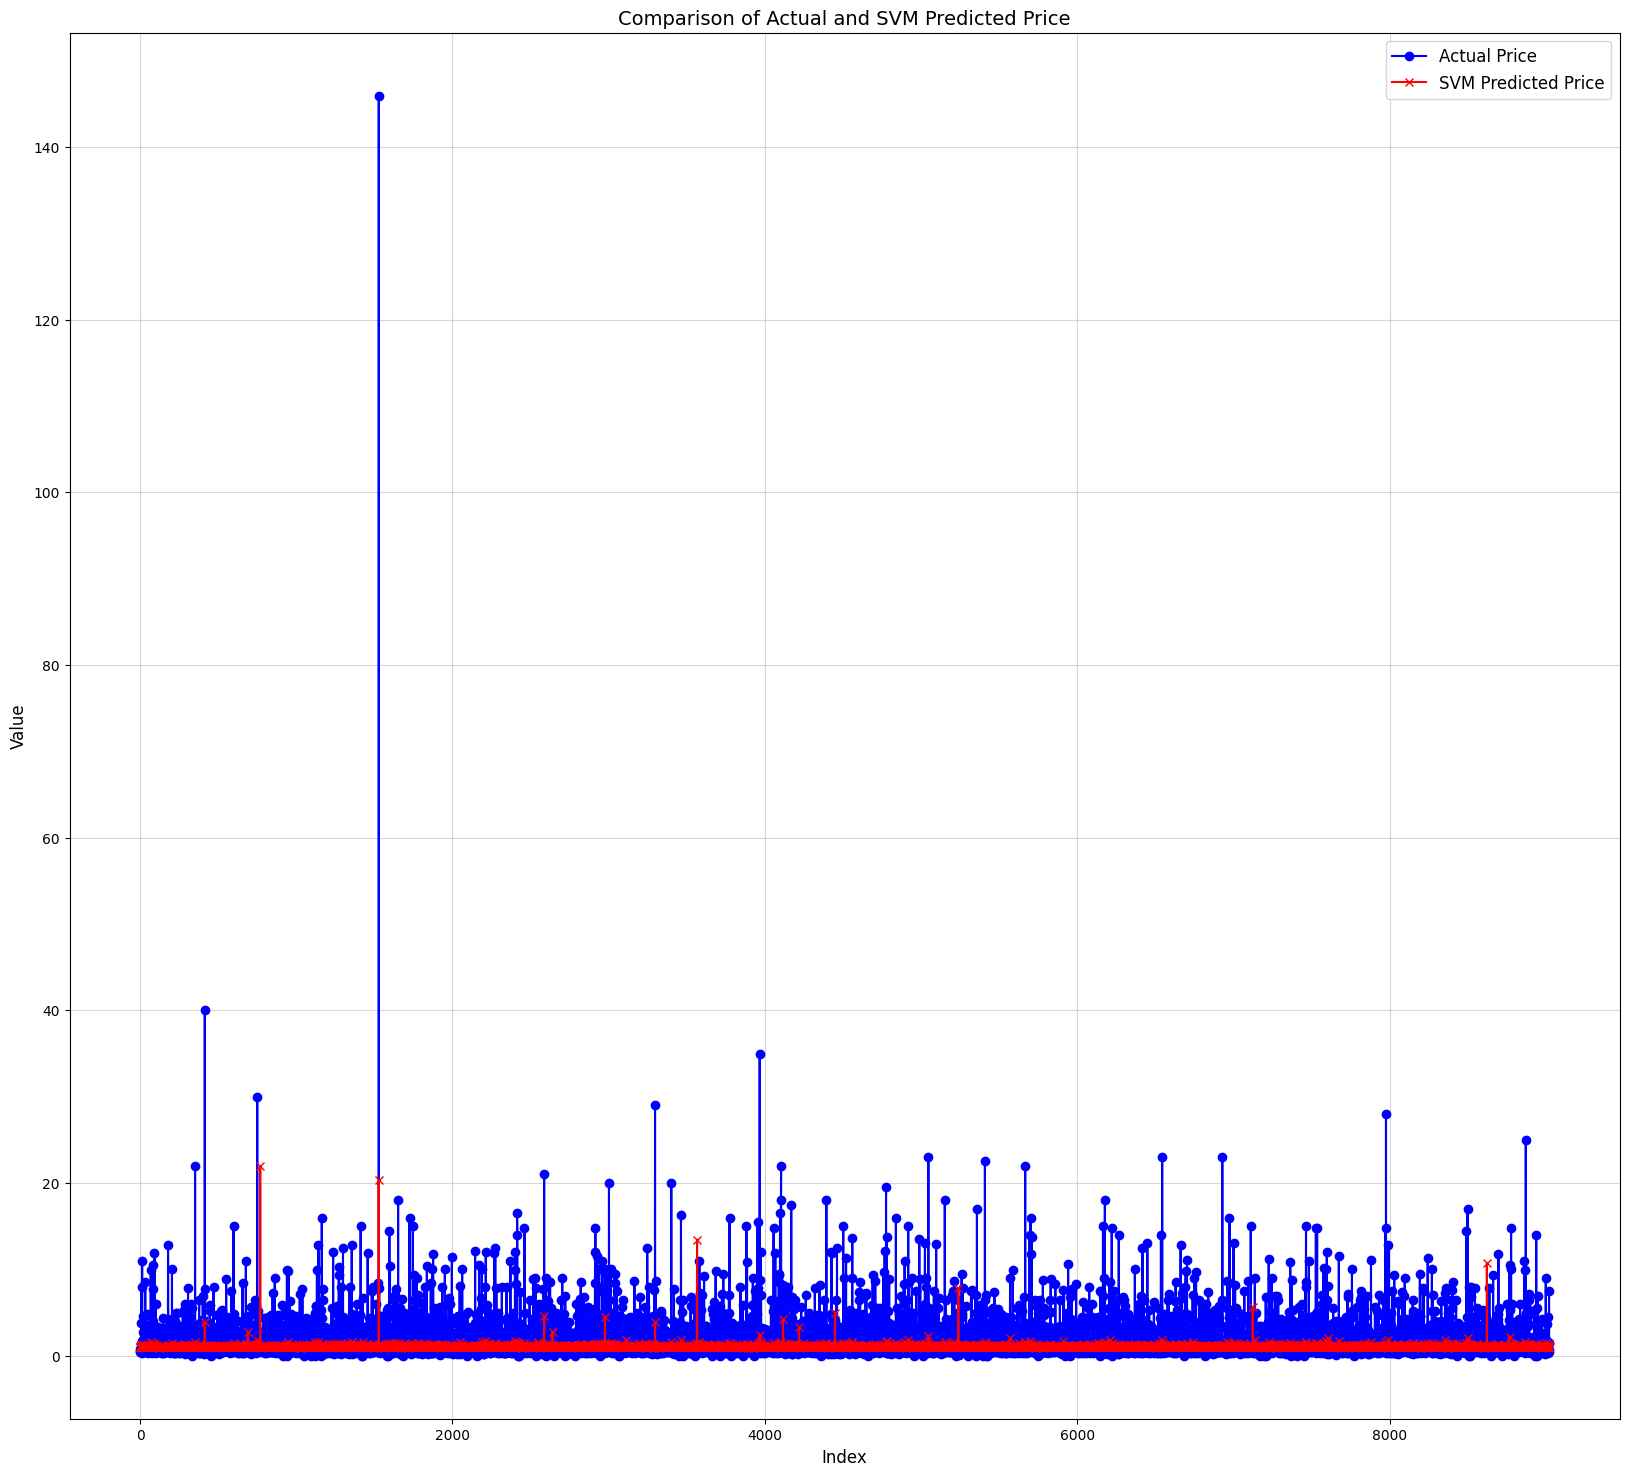

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

model_SVR = svm.SVR()
model_1=model_SVR.fit(X_train,Y_train)
Y_pred_svm = model_SVR.predict(X_valid)

print('MAPE: ',mean_absolute_percentage_error(Y_valid, Y_pred_svm))
print('RMSE: ', rmse(Y_valid, Y_pred_svm))
print('R-sqaured', r2_score(Y_valid, Y_pred_svm))

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 18))
plt.plot(range(len(Y_valid)), Y_valid, marker='o', label='Actual Price', color='blue')
plt.plot(range(len(Y_pred_svm)), Y_pred_svm, marker='x', label='SVM Predicted Price', color='red')

# Add annotations and grid
plt.title('Comparison of Actual and SVM Predicted Price', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_2=model_RFR.fit(X_train, Y_train)
Y_pred_RFR = model_RFR.predict(X_valid)

print('MAPE: ',mean_absolute_percentage_error(Y_valid, Y_pred_RFR))
print('RMSE: ', rmse(Y_valid, Y_pred_RFR))
print('R-sqaured', r2_score(Y_valid, Y_pred_RFR))

MAPE:  2.4939123827425083
RMSE:  0.3884841686194838
R-sqaured 0.7925450511688739


In [63]:
from sklearn.linear_model import LinearRegression

model_MLR = LinearRegression()
model_3=model_MLR.fit(X_train, Y_train)
Y_pred_MLR = model_MLR.predict(X_valid)

print('MAPE: ',mean_absolute_percentage_error(Y_valid, Y_pred_MLR))
print('RMSE: ', rmse(Y_valid, Y_pred_MLR))
print('R-squared', r2_score(Y_valid, Y_pred_MLR))

MAPE:  3.2349379825362283
RMSE:  0.6105695524811651
R-squared 0.48755479286784686


In [64]:
# pip install xgboost
import xgboost
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
model_xgb.fit(X_train, Y_train)

Y_pred_XGB = model_xgb.predict(X_valid)

print('MAPE: ',mean_absolute_percentage_error(Y_valid, Y_pred_XGB))
print('RMSE: ', rmse(Y_valid, Y_pred_XGB))
print('R-squared', r2_score(Y_valid, Y_pred_XGB))




MAPE:  2.550294593164309
RMSE:  0.4021548068820798
R-squared 0.7776876051827923


In [68]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X = df_final.drop(['Price','Location','Property Type'], axis=1)
y = df_final['Price']

# Initialize K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores, mape_scores, r2_scores = [], [], []

model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print("XGBoost Results:")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAPE: {np.mean(mape_scores):.4f}% ± {np.std(mape_scores):.4f}%")
print(f"R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

XGBoost Results:
RMSE: 0.3985 ± 0.0095
MAPE: 265.1770% ± 47.0407%
R²: 0.7786 ± 0.0092


In [69]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X = df_final.drop(['Price','Location','Property Type'], axis=1)
y = df_final['Price']

# Initialize K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores, mape_scores, r2_scores = [], [], []

model_MLR = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_MLR.fit(X_train, y_train)
    y_pred = model_MLR.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print("Linear Regression Results:")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAPE: {np.mean(mape_scores):.4f}% ± {np.std(mape_scores):.4f}%")
print(f"R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Linear Regression Results:
RMSE: 0.6053 ± 0.0150
MAPE: 330.4032% ± 42.2830%
R²: 0.4896 ± 0.0146


In [70]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X = df_final.drop(['Price','Location','Property Type'], axis=1)
y = df_final['Price']

# Initialize K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores, mape_scores, r2_scores = [], [], []

model_RFR = RandomForestRegressor(n_estimators=10)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_RFR.fit(X_train, y_train)
    y_pred = model_RFR.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print("RandomForest Results:")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAPE: {np.mean(mape_scores):.4f}% ± {np.std(mape_scores):.4f}%")
print(f"R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

RandomForest Results:
RMSE: 0.3815 ± 0.0070
MAPE: 242.0102% ± 49.3153%
R²: 0.7972 ± 0.0067


In [71]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X = df_final.drop(['Price','Location','Property Type'], axis=1)
y = df_final['Price']

# Initialize K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores, mape_scores, r2_scores = [], [], []

model_SVR = svm.SVR()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_SVR.fit(X_train, y_train)
    y_pred = model_SVR.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print("SVM Results:")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAPE: {np.mean(mape_scores):.4f}% ± {np.std(mape_scores):.4f}%")
print(f"R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

SVM Results:
RMSE: 0.8984 ± 0.0421
MAPE: 326.4969% ± 36.9749%
R²: -0.1263 ± 0.1015


SHAP plot for monitoring Feature Importance

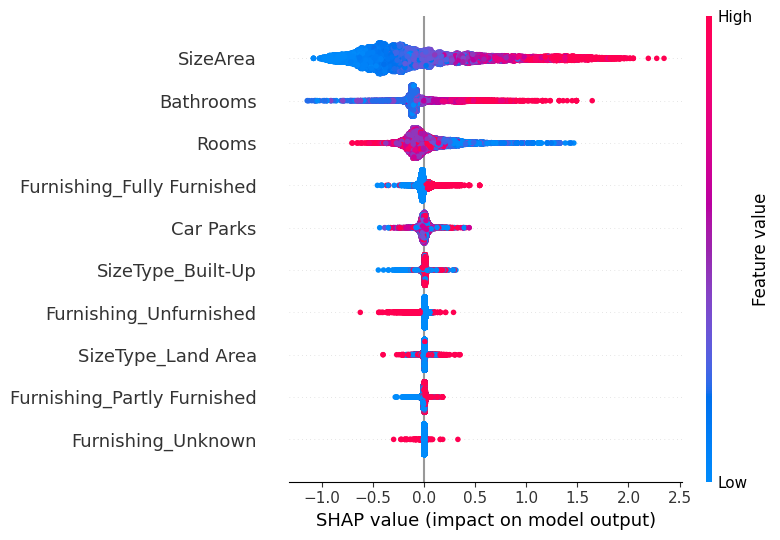

In [77]:
import shap

# Train the RF model
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,Y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_train)

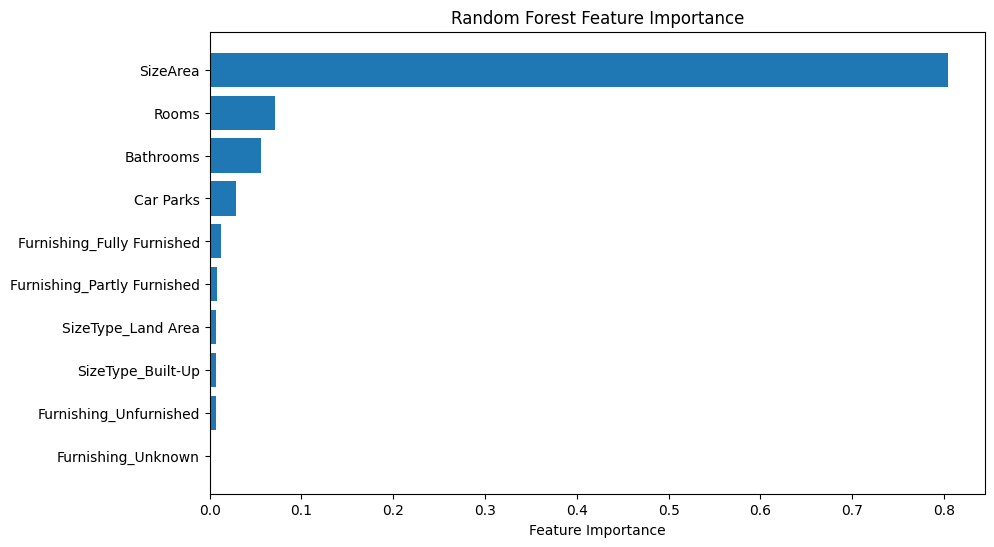

In [78]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Train the RandomForest model
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, Y_train)

# Get feature importance
importances = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
indices = importances.argsort()  # Sorting features by importance
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Hyperparameter Tuning via Optuna

In [81]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


In [88]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

X = df_final.drop(['Price','Location','Property Type'], axis=1)
y = df_final['Price']

# Objective function for Optuna
def objective(trial):
    # Suggest parameters
    n_estimators = trial.suggest_int("n_estimators", 10,20)


    # Define model with suggested hyperparameters
    RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=42
    ).fit(X, y)

    # Cross-validation with RMSE as the evaluation metric
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return -np.mean(scores)  # Return the negative RMSE (as we minimize in Optuna)

# Create and optimize the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# Results
print("Best Parameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-01-09 21:29:41,111] A new study created in memory with name: no-name-8d3b2686-9ff2-41cb-92c3-393428676a6d
[I 2025-01-09 21:29:46,145] Trial 0 finished with value: 0.1627442708076078 and parameters: {'n_estimators': 13}. Best is trial 0 with value: 0.1627442708076078.
[I 2025-01-09 21:29:52,784] Trial 1 finished with value: 0.1627442708076078 and parameters: {'n_estimators': 20}. Best is trial 0 with value: 0.1627442708076078.
[I 2025-01-09 21:29:57,880] Trial 2 finished with value: 0.1627442708076078 and parameters: {'n_estimators': 11}. Best is trial 0 with value: 0.1627442708076078.
[I 2025-01-09 21:30:02,713] Trial 3 finished with value: 0.1627442708076078 and parameters: {'n_estimators': 11}. Best is trial 0 with value: 0.1627442708076078.
[I 2025-01-09 21:30:09,161] Trial 4 finished with value: 0.1627442708076078 and parameters: {'n_estimators': 15}. Best is trial 0 with value: 0.1627442708076078.
[I 2025-01-09 21:30:14,359] Trial 5 finished with value: 0.1627442708076078 

Best Parameters: {'n_estimators': 13}
Best RMSE: 0.1627442708076078


Lastly, we output our model as our final data product, and we deploy it on Google Cloud Service to provide a house price prediction solution for people who need it.

In [89]:
import joblib

X = df_final.drop(['Price','Location','Property Type'], axis=1)
y = df_final['Price']

final_model = RandomForestRegressor(n_estimators=19)
final_model.fit(X, y)

#Export to model file, our data product
joblib.dump(final_model, 'random_forest_model.pkl')


['random_forest_model.pkl']